In [ ]:
!wget https://www.datos.gov.co/api/views/kgxf-xxbe/rows.csv?accessType=DOWNLOAD --no-check-certificate -O data.csv

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.offline as py#visualizacion
py.init_notebook_mode(connected=True)#visualizacion
import plotly.graph_objs as go#visualizacion
import plotly.tools as tls#visualizacion
import plotly.figure_factory as ff#visualizacion
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import json

In [ ]:
#Se carga el DataFrame
datos = pd.read_csv("data.csv",low_memory=False)

In [ ]:
#Borra todos los registros que tengan registros nulos
datos = datos.dropna()
    

In [ ]:
# Se muestra la información del DF
datos.info()

In [ ]:
datos

# Se inicia el Análisis de los datos


###### Para el análisis de los datos de este trabajo aplicado, se toma un conjunto de datos publicos extraidos de datos abiertos (https://www.datos.gov.co/)
###### Estos datos son anónimos y se puede ver que la estructura de los datos es de 51 columnas y 2800546 filas.

In [ ]:
pre_data = datos[['ESTU_PRIVADO_LIBERTAD', 'COLE_BILINGUE', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_TIENEAUTOMOVIL',  'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'PUNT_GLOBAL']]

In [ ]:
pre_data

In [ ]:
# Se crean las funciones para convertir las columnas para el analisis de los datos

#Convierte Si Y No en Valores 1 y 0
def convertS_N(valor):
    if valor=='N' or valor=='No':
        return 0
    elif valor=='S'or valor=='Si':
        return 1

#Convierte los datos texto en numerico para los cuartos del hogar
def convert_cuartos_hogar(valor):
    if valor=='Uno':
        return 1
    elif valor=='Dos':
        return 2
    elif valor=='Tres':
        return 3
    elif valor=='Cuatro':
        return 4
    elif valor=='Cinco':
        return 5
    elif valor=='Seis' or valor=='Seis o mas':
        return 6
    elif valor=='Siete':
        return 7
    elif valor=='Ocho':
        return 8
    elif valor=='Nueve':
        return 9
    elif valor=='Diez o más':
        return 10
    
#Convierte los datos texto en numerico para la educacion de los padres
def convert_educacion(valor):
    if valor=='Ninguno' or valor=='No sabe' or valor=='No Aplica':
        return 0
    elif valor=='Primaria incompleta':
        return 1
    elif valor=='Primaria completa':
        return 2
    elif valor=='Secundaria (Bachillerato) incompleta':
        return 3
    elif valor=='Secundaria (Bachillerato) completa':
        return 4
    elif valor=='Técnica o tecnológica incompleta':
        return 5
    elif valor=='Técnica o tecnológica completa':
        return 6
    elif valor=='Educación profesional incompleta':
        return 7
    elif valor=='Educación profesional completa':
        return 8
    elif valor=='Postgrado':
        return 9


#Convierte los datos texto en numerico para el estrato del estudiante
def convert_estrato(valor):
    if valor=='Sin Estrato':
        return 0
    elif valor=='Estrato 1':
        return 1
    elif valor=='Estrato 2':
        return 2
    elif valor=='Estrato 3':
        return 3
    elif valor=='Estrato 4':
        return 4
    elif valor=='Estrato 5':
        return 5
    elif valor=='Estrato 6':
        return 6

#Convierte los datos texto en numerico el numero de personas en el hogar
def convert_numero_personas(valor):
    if valor=='Una':
        return 1
    elif valor=='1 a 2' or valor=='Dos':
        return 2
    elif valor=='Tres':
        return 3
    elif valor=='Cuatro'or valor=='3 a 4':
        return 4
    elif valor=='Cinco':
        return 5
    elif valor=='Seis' or valor=='5 a 6':
        return 6
    elif valor=='Siete':
        return 7
    elif valor=='Ocho' or valor=='7 a 8':
        return 8
    elif valor=='Nueve':
        return 9
    elif valor=='Diez' or valor=='9 o más':
        return 10
    elif valor=='Once':
        return 11
    elif valor=='Doce o más':
        return 12

In [ ]:
#Convierte los registros en numericos como se necesitan
pre_data["PRIVADO_LIBERTAD"] = pre_data["ESTU_PRIVADO_LIBERTAD"].apply(convertS_N)
pre_data["COLEGIO_BILINGUE"] = pre_data["COLE_BILINGUE"].apply(convertS_N)
pre_data["TIENE_AUTOMOVIL"] = pre_data["FAMI_TIENEAUTOMOVIL"].apply(convertS_N)
pre_data["TIENE_COMPUTADOR"] = pre_data["FAMI_TIENECOMPUTADOR"].apply(convertS_N)
pre_data["TIENE_INTERNET"] = pre_data["FAMI_TIENEINTERNET"].apply(convertS_N)
pre_data["TIENE_LAVADORA"] = pre_data["FAMI_TIENELAVADORA"].apply(convertS_N)
pre_data["CUARTOS_HOGAR"] = pre_data["FAMI_CUARTOSHOGAR"].apply(convert_cuartos_hogar)
pre_data["EDUCACION_MADRE"] = pre_data["FAMI_EDUCACIONMADRE"].apply(convert_educacion)
pre_data["EDUCACION_PADRE"] = pre_data["FAMI_EDUCACIONPADRE"].apply(convert_educacion)
pre_data["ESTRATO_VIVIENDA"] = pre_data["FAMI_ESTRATOVIVIENDA"].apply(convert_estrato)
pre_data["PERSONAS_HOGAR"] = pre_data["FAMI_PERSONASHOGAR"].apply(convert_numero_personas)

In [ ]:
#Columnas que se requieren 
data = pre_data[['EDUCACION_MADRE',  'EDUCACION_PADRE', 'COLEGIO_BILINGUE', 'TIENE_AUTOMOVIL', 
              'TIENE_COMPUTADOR', 'TIENE_INTERNET', 'TIENE_LAVADORA', 'CUARTOS_HOGAR', 
               'ESTRATO_VIVIENDA', 'PERSONAS_HOGAR','PRIVADO_LIBERTAD', 'PUNT_GLOBAL']]

In [ ]:
data

,Unnamed: 0,EDUCACION_MADRE,EDUCACION_PADRE,COLEGIO_BILINGUE,TIENE_AUTOMOVIL,TIENE_COMPUTADOR,TIENE_INTERNET,TIENE_LAVADORA,CUARTOS_HOGAR,ESTRATO_VIVIENDA,PERSONAS_HOGAR,PRIVADO_LIBERTAD,PUNT_GLOBAL,PUNTAJE_BIN
0,0,9,2,0,0,1,1,1,2,2,2,0,339.0,1
1,1,9,2,0,0,1,1,1,2,2,2,0,339.0,1
2,2,1,1,0,0,0,0,0,2,1,6,0,199.0,0
3,3,1,1,0,0,0,0,0,2,1,6,0,199.0,0
4,4,3,4,0,1,1,1,1,4,5,5,0,272.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800541,2800541,4,0,0,0,1,0,1,2,1,5,0,238.0,1
2800542,2800542,1,1,0,0,0,0,1,2,2,5,0,298.0,1
2800543,2800543,6,6,0,1,1,1,1,2,3,3,0,315.0,1
2800544,2800544,6,6,0,1,1,1,1,3,3,4,0,214.0,0


In [ ]:
data.corr()['PUNT_GLOBAL'].sort_values()

PERSONAS_HOGAR     -0.131823
PRIVADO_LIBERTAD   -0.005746
Unnamed: 0         -0.000391
CUARTOS_HOGAR       0.037127
COLEGIO_BILINGUE    0.118453
TIENE_LAVADORA      0.186706
TIENE_AUTOMOVIL     0.266195
TIENE_INTERNET      0.304855
TIENE_COMPUTADOR    0.305385
ESTRATO_VIVIENDA    0.366670
EDUCACION_PADRE     0.379567
EDUCACION_MADRE     0.418903
PUNTAJE_BIN         0.750070
PUNT_GLOBAL         1.000000
Name: PUNT_GLOBAL, dtype: float64

In [ ]:
# Se importa otra libreria para graficos avanzados 
mpl.style.use('ggplot')

# Se crea una nueva columna de puntaje global para las graficas
data['PUNTAJE_BIN'] = data['PUNT_GLOBAL'].apply(lambda x: 1 if x >= 230 else 0)
aceptables     = data[data["PUNTAJE_BIN"] == 1]
no_aceptables = data[data["PUNTAJE_BIN"] == 0]


##### En el conjunto de datos, ya se han separado los puntajes que se consideran aceptables 
##### Usando estas variables se puede evidenciar en un gráfico circular como se presentan los puntajes de los estudiantes.

In [ ]:
# se transforman los valores, para que en la gráfica se muestren Si y No, en lugar de 1 y 0
lab = ["NO", "SI"]
#values
val = data["PUNTAJE_BIN"].value_counts().values.tolist()

In [ ]:
val

[1885294, 915252]

In [ ]:
# En esta grafica se puede ver la distribución de los estudiantes segun su puntaje
trace = go.Pie(labels = lab ,
               values = val ,
               name="Aceptable",
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Distribución de los estudiantes según su puntaje (ACEPTABLE / NO ACEPTABLE)",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

In [ ]:
# se imprime el gráfico
data_grafico = [trace]
fig = go.Figure(data = data_grafico,layout = layout)
py.iplot(fig)

##### Se utilizan gráficos circulares, para visualizar el comportamiento de las variables categoricas, respecto a la variable del puntaje global

In [ ]:
#Funcion para crear los graficos de pastel por tipos de puntajes de estudiantes con variables cualitativas
def plot_pie(column) :
    
    trace1 = go.Pie(values  = aceptables[column].value_counts().values.tolist(),
                    labels  = aceptables[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Aceptable",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = no_aceptables[column].value_counts().values.tolist(),
                    labels  = no_aceptables[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "No Aceptable" 
                   )
 
 
    layout = go.Layout(dict(title = "Distribución de los estudiantes según " +column,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Aceptable",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "No Aceptable",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace2,trace1]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

In [ ]:
#tets_columns = ['EDUCACION_MADRE',  'EDUCACION_PADRE','TIENE_COMPUTADOR', 'TIENE_INTERNET','ESTRATO_VIVIENDA']
tets_columns = ['COLEGIO_BILINGUE', 'TIENE_AUTOMOVIL','TIENE_COMPUTADOR', 'TIENE_INTERNET']

for i in tets_columns :
    plot_pie(i)

# Análisis de gráficas de Pastel

En las gráficas anteriores, se puede evidenciar que:

- Para las variables de COLEGIO BILINGUE y TIENE AUTOMOVIL no son determinantes al momento de definir el puntaje de un estudiante.

- Para la grafica de la variable TIENE COMPUTADOR se puede evidenciar que los estudiantes que no tienen computador son mas vulnerables a entrar a los puntajes "NO ACEPTABLES".

- Para la grafica de la variable TIENE INTERNET se puede evidenciar que los estudiantes que no tienen internet son mas vulnerables a entrar a los puntajes "NO ACEPTABLES".


## A continuación se utilizan gráficos de barras, para visualizar el comportamiento de las variables cuantitativas, respecto a la variable del puntaje


In [ ]:
#Funcion para crear el histograma por tipos de puntajes de los estudiantes con variables cuantitativas
def histogram(column) :
    trace1 = go.Histogram(x  = aceptables[column],
                          histnorm= "percent",
                          name = "Aceptables",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = no_aceptables[column],
                          histnorm = "percent",
                          name = "No Aceptables",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace2,trace1]
    layout = go.Layout(dict(title ="Distribución de los estudiantes según " + column,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "Porcentaje",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

In [ ]:
#Prueba de columnas para los histogramas  
test_columns = ["EDUCACION_MADRE", "EDUCACION_PADRE", "ESTRATO_VIVIENDA"]
for i in test_columns:
    histogram(i)

# Análisis Gráficos de Barra

En las gráficas anteriores, se puede evidenciar que:

- Tanto como en la variable de la EDUCACION MADRE y EDUCACION PADRE se puede analizar que hay una distribución casi uniforme en los puntajes "no aceptables",  y en los puntajes "aceptables" se puede notar que hay una amplia ventaja de la educacion nivel 4 sobre los demas niveles. 
- En la variable de ESTRATO VIVIENDA se puede analizar que hay una distrubución casi uniforme con respecto a los puntajes "ACEPTABLES", pero en los puntajes "NO ACEPTABLES" se evidencia un amplio porcentaje en el estrato 1 por encima de los demas.

# A continuación se realizarán gráficos de dispersión para mostrar la diferencia entre dos variables, como se relacionan entre sí y determinar su dependencia.

In [ ]:
#función para matriz de diagrama de dispersión para columnas de datos numéricas
def scatter_matrix(df):
    
    df  = df.sort_values(by = "PUNTAJE_BIN" ,ascending = False)
    classes = df["PUNTAJE_BIN"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code
 
    color_vals = [class_code[cl] for cl in df["PUNTAJE_BIN"]]
    color_vals
 
    pl_colorscale = "Portland"
 
    pl_colorscale
 
    text = [df.loc[k,"PUNTAJE_BIN"] for k in range(len(df))]
    text
 
    trace = go.Splom(dimensions = [dict(label  = "EDUCACION DE LA MADRE",
                                       values = df["EDUCACION_MADRE"]),
                                  dict(label  = 'EDUCACION DEL PADRE',
                                       values = df['EDUCACION_PADRE']),
                                  dict(label  = 'ESTRATO DE LA VIVIENDA',
                                       values = df['ESTRATO_VIVIENDA'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Matriz de gráficos de dispersión para columnas numéricas",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)

In [ ]:
scatter_matrix(data)

##### Con estas gráficas se puede concluir que entre las variables cuantitativas no existe relación ya que  no se observa una tendencia clara en la dirección de los puntos en el gráfico. En otras palabras, los puntos parecen distribuirse al azar sin seguir un patrón discernible, lo que es probable que no haya una relación significativa entre las variables.

##### Sin embargo, para poder determinar si existe una relación o no, es importante realizar un análisis estadístico adecuado, como un coeficiente de correlación.

# A continuación se realizará una matriz de correlación con todas las columnas del data frame para observar la correlación entre ellas y su comportamiento a partir de una métrica.

In [ ]:
correlation = data.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)
 
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Coeficiente de correlacion",
                                     titleside = "right"
                                    ) ,
                  )
 
layout = go.Layout(dict(title = "Correlación Matrix por variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )
 
data_corr = [trace]
fig = go.Figure(data=data_corr,layout=layout)

py.iplot(fig)

# Resumen Matriz Correlación

En esta matriz se pudo observar que las variables de educacion madre y educacion padre tienen una relación positiva, al igual que las variables tiene computador vs tiene internet, y el estrato de la vivienda vs las 4 variables mencionadas anteriormente.

# Se reduce la dimensionalidad con PCA
Analizando el resultado de los análisis anteriores, se llega a la conclusión de que las variables (COLEGIO_BILINGUE, TIENE_AUTOMOVIL, TIENE_LAVADORA, CUARTOS_HOGAR y PRIVADO_LIBERTAD), se excluyen ya que no aportan valor a la hora de resolver el problema.

Excluyendo tambien la variable PUNTAJE GLOBAL, que es la variable a predecir. Realizando esta acción quedan 5 variables, por lo tanto, utilizando PCA (Análisis de Componentes Principales) se reduce la dimensionalidad y se puede visualizar mejor.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, normalize

# Se crea las gráfica de dispersión
no_data = ['PUNTAJE_BIN', 'PUNT_GLOBAL']
y = data['PUNTAJE_BIN']
X = data[[i for i in data.columns if i not in no_data]]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(14, 12))
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor=data['PUNTAJE_BIN'].apply(lambda x: 'red' if x == 0 else 'blue'),cmap='coolwarm', marker='D', facecolor='none', label=['ROJO - NO ACEPTABLE', 'AZUL - ACEPTABLE'])
# Agregar leyenda
plt.legend(loc='upper left')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title("PCA scatter de los datos según el puntaje obtenido")
plt.show()

Este gráfico de dispersión  nos muestra que no existe una separación clara y evidente entre los puntajes que son considerados aceptables y los que no lo son.

# Se entrenan los modelos con base en el análisis anterior

In [ ]:

# Se declaran las variables de entrenamiento, se dividen los datos en 80% para entrenar y 20% para test
X = data[['EDUCACION_MADRE', 'EDUCACION_PADRE', 'TIENE_COMPUTADOR', 'TIENE_INTERNET','ESTRATO_VIVIENDA']]

y = data['PUNTAJE_BIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [18]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560110 entries, 2614853 to 116002
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   EDUCACION_MADRE   560110 non-null  int64
 1   EDUCACION_PADRE   560110 non-null  int64
 2   TIENE_COMPUTADOR  560110 non-null  int64
 3   TIENE_INTERNET    560110 non-null  int64
 4   ESTRATO_VIVIENDA  560110 non-null  int64
dtypes: int64(5)
memory usage: 25.6 MB


In [12]:
### Se utiliza la librería XGBoost para visualizar las variables importantes para el modelo

from xgboost import XGBClassifier
from xgboost import plot_importance

In [19]:
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

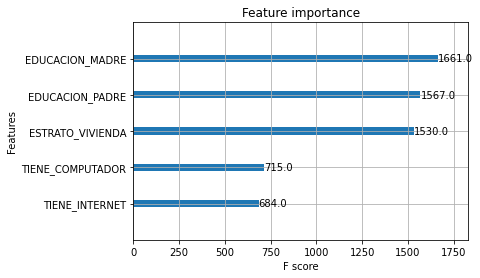

In [20]:
# Se imprimen las variables relevantes para predecir el retiro
plot_importance(model)

# XGBoost

En la gráfica se destacan las 5 variables como determinantes para la predicción.

In [22]:
# Se declaran las variables de entrenamiento, se dividen los datos en 80% para entrenar y 20% para test
X = data[['EDUCACION_MADRE', 'EDUCACION_PADRE', 'TIENE_COMPUTADOR', 'TIENE_INTERNET','ESTRATO_VIVIENDA']]

y = data['PUNT_GLOBAL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Crear instancias de los modelos
models = [
    LinearRegression(),
    Ridge(alpha=0.1, random_state=42),
    Lasso(alpha=0.1, random_state=42),
    ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
    DecisionTreeRegressor(random_state=42),
]

# Entrenar y evaluar cada modelo
for model in models:
    model.fit(X_train, y_train)
    print(f'{type(model).__name__}: Score = {model.score(X_train,y_train):.4f}')

LinearRegression: Score = 0.2423
Ridge: Score = 0.2423
Lasso: Score = 0.2423
ElasticNet: Score = 0.2419
DecisionTreeRegressor: Score = 0.2695


##### Después de entrenar los modelos de LinearRegression,  Ridge, Lasso,ElasticNet y  DecisionTreeRegressor se puede notar que el de  DecisionTreeRegressor es el de mayor precisión para el problema planteado.

##### Se envidencia que los scores de los modelos entrenados son bajos y no tienen una precisión viable para poder predecir el puntaje de un estudiante.

# Resultado 

In [24]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'{type(dt).__name__}: R2 score = {r2:.4f}')

DecisionTreeRegressor: R2 score = 0.2648


In [25]:
EM = X_test['EDUCACION_MADRE']
EP = X_test['EDUCACION_PADRE']
TC = X_test['TIENE_COMPUTADOR']
TI = X_test['TIENE_INTERNET']
EV = X_test['ESTRATO_VIVIENDA']

#se organiza para mostrar una tabla con la información del  estudiante y  la prediccion del puntaje 
out_dt=pd.DataFrame({'EDUCACION_MADRE MADRE':EM, 'EDUCACION_PADRE': EP, 'TIENE_COMPUTADOR': TC,
                      'TIENE_INTERNET':TI, 'ESTRATO_VIVIENDA': EV, 'PUNTAJE':y_pred})
out_dt['PUNTAJE_ACEPTABLE'] = out_dt['PUNTAJE'].apply(lambda x: 'SI' if x >= 230 else 'NO')
out_dt

,EDUCACION_MADRE MADRE,EDUCACION_PADRE,TIENE_COMPUTADOR,TIENE_INTERNET,ESTRATO_VIVIENDA,PUNTAJE,PUNTAJE_ACEPTABLE
2614853,3,4,1,1,2,257.451864,SI
1782674,4,4,1,1,2,260.207052,SI
2414515,5,3,1,1,2,265.701047,SI
1150921,1,1,0,0,1,225.840868,NO
631515,5,4,0,0,2,255.345556,SI
...,...,...,...,...,...,...,...
2763328,1,3,0,0,1,231.544439,SI
2091685,4,6,1,1,3,279.791289,SI
10863,0,1,0,0,1,219.322320,NO
786531,0,0,1,1,3,260.453451,SI


In [ ]:
#Se exporta el dataframe de puntajes en un csv
out_dt.to_csv('RESULTADO_PREDICCION.csv', encoding='utf-8')